İMPORTS

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

# Google Drive'ı bağlayın
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/bank.csv" , sep=",", encoding='utf-8')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<Axes: xlabel='age', ylabel='Count'>

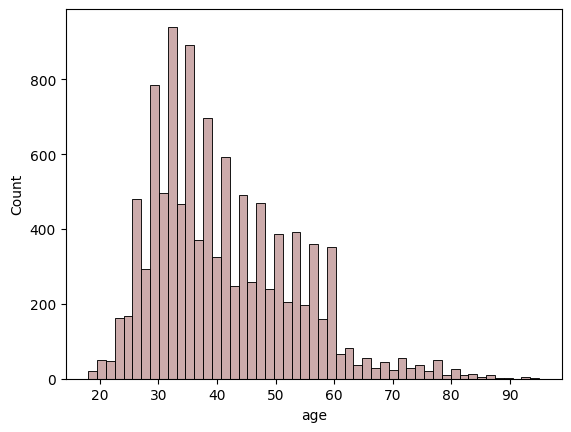

In [6]:
sns.histplot(x="age",data=df ,color = 'rosybrown')

Datatype sadece sayısal değer olanları seç

In [7]:
numeric_df = df.select_dtypes(include=[np.number])

<Axes: >

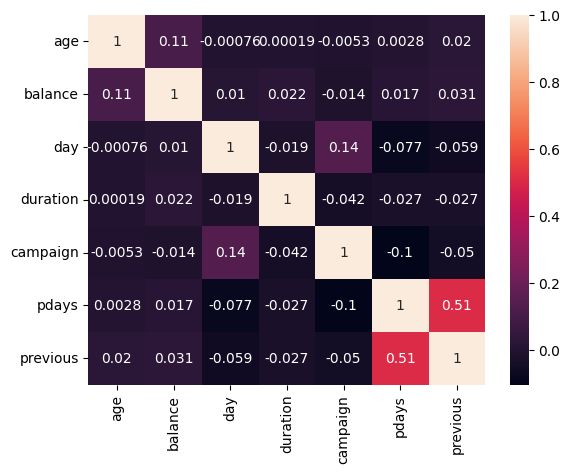

In [8]:
# Korelasyon matrisini çiz
sns.heatmap(numeric_df.corr(), annot=True)

In [9]:
#DataSeti içerisinde Empty Simple sayısı
df.isnull().sum()/df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [10]:
#Veri tabanı içerisinde kolonları tek tek gezerek içerisinde bulunan nesnel (string vb.) değerleri
#Sayısal Değerlere Dönüştürmek için
le = LabelEncoder()

for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

In [11]:
#Data setindeki tüm columları görebilmek için
 # Tüm sütunları göster
pd.set_option('display.max_columns', None)
 # 10 satır göster
pd.set_option('display.max_rows', 10)     # 10 satır göster
## print(df)
#Datasetini sayısal verilere dönüştürülmüş halini saveledik
df.to_csv("output.csv", index=False)
##print(df.columns)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


Sayısal değerleri getir

In [23]:
numeric_df = df.select_dtypes(include=[np.number])

In [37]:
# Grafiğin boyutunu belirleme
sns.set(rc={'figure.figsize':(30, 10)})

<Axes: >

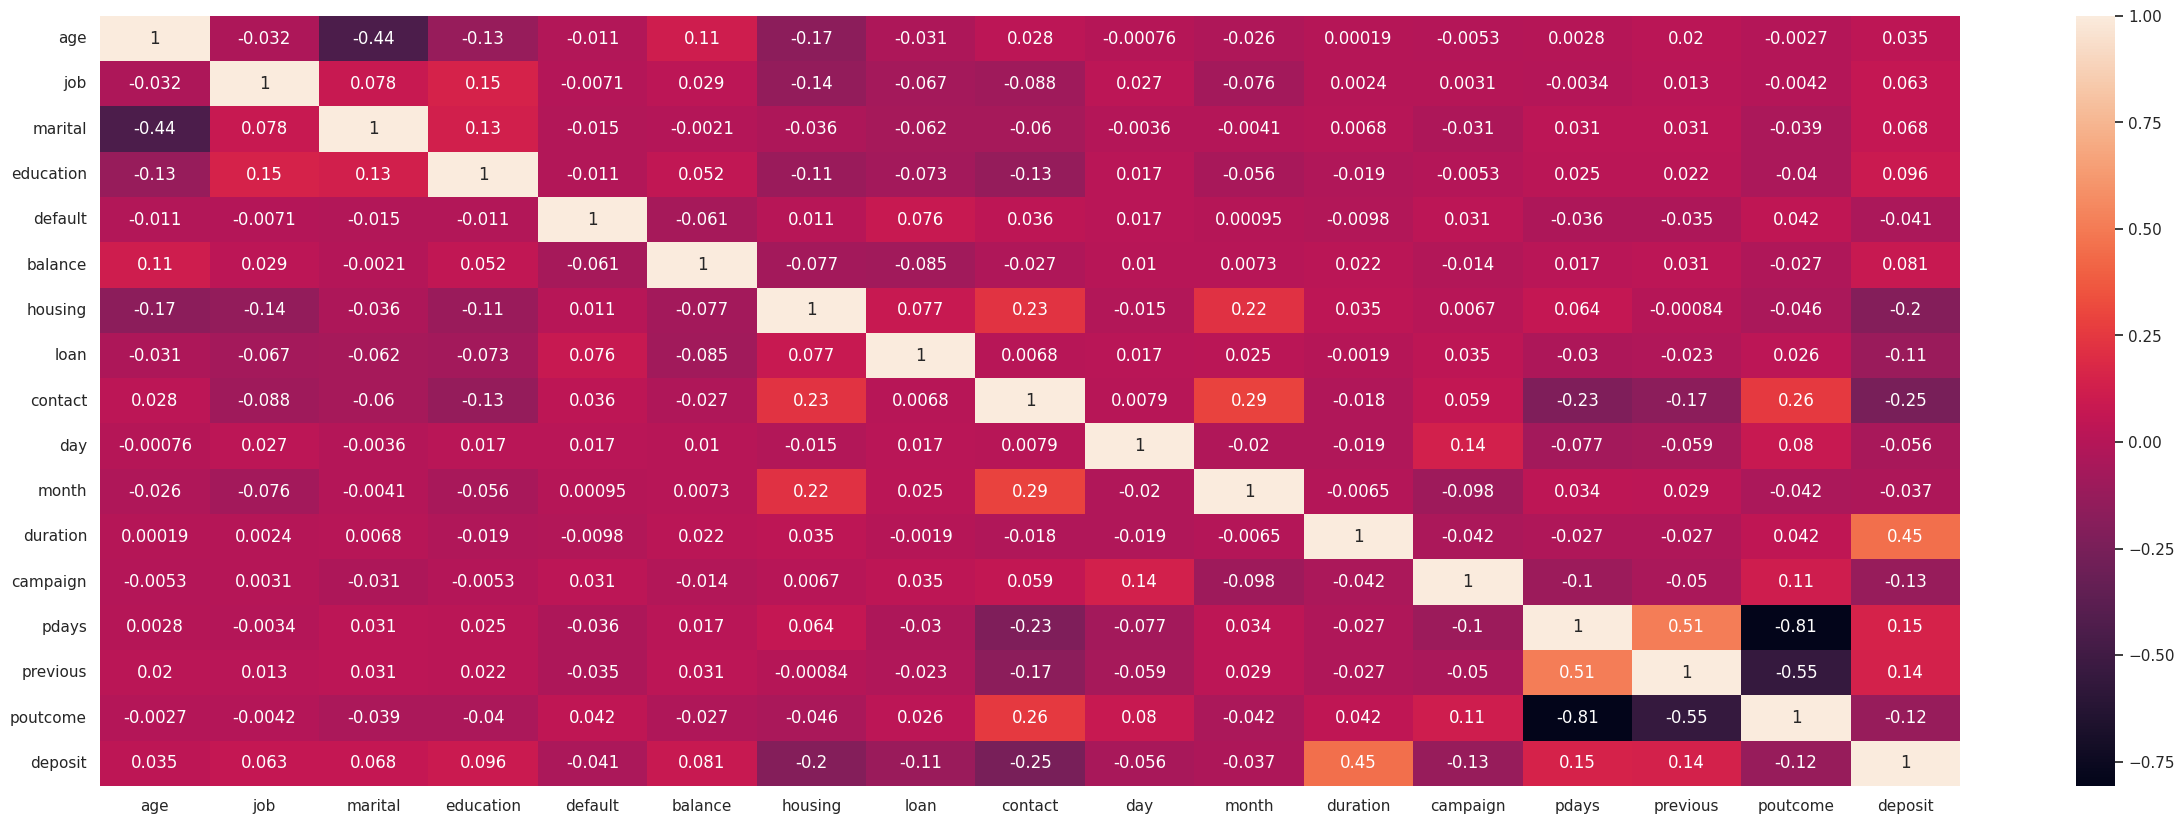

In [38]:
sns.heatmap(numeric_df.corr(), annot=True)

In [39]:
x = df.drop([  'day', 'month','pdays','previous','deposit'],axis =1)
y = df["deposit"]

In [40]:
#StandardScaler, veri özelliklerini (örneğin, sütunlardaki değerleri) ortalama değeri
#0 ve standart sapması 1 olacak şekilde ölçeklendirmeye yarayan bir ölçeklendirme yöntemidir. Bu işlem, veriye aynı ölçekte bakmayı
#sağlar ve bazı makine öğrenimi algoritmalarının daha iyi performans göstermesine yardımcı olur.
st = StandardScaler()
df["balance"] = st.fit_transform(df[["balance"]])
df["duration"] = st.fit_transform(df[["duration"]])

In [41]:
# x_train: Eğitim setindeki bağımsız değişkenlerin değerleri.
# x_test: Test setindeki bağımsız değişkenlerin değerleri.
# y_train: Eğitim setindeki bağımlı değişkenin değerleri.
# y_test: Test setindeki bağımlı değişkenin değerleri.
x_train , x_test ,y_train ,y_test =train_test_split(x,y ,test_size=0.25 ,random_state= 42)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)


(11162, 12)
(8371, 12)
(2791, 12)
(11162,)
(8371,)
(2791,)


MODEL 1

In [43]:
   ##Logistic Regression

lg = LogisticRegression(penalty ="l2" ,C=0.5)

lg_results = train_evaluate_model(lg, x_train, y_train, x_test, y_test)

lg_results.index = ['LogisticRegression']

lg_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.752060,0.729052,0.767519,0.694258,0.749888


MODEL 2

In [102]:
decision_tree = DecisionTreeClassifier(max_depth= 5,max_features=4)
decision_tree_results = train_evaluate_model(decision_tree,x_train, y_train, x_test, y_test)

decision_tree_results.index = ['DecisionTree']
decision_tree_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.766392,0.746304,0.780309,0.715138,0.764466


In [103]:
result = pd.concat([decision_tree_results,lg_results], ignore_index=True)
print(result)

   accuracy  f1_score  precision    recall  balanced_accuracy
0  0.766392  0.746304   0.780309  0.715138           0.764466
1  0.777857  0.761355   0.786794  0.737509           0.776341


MODEL 3

In [104]:
KNN = KNeighborsClassifier(n_neighbors=13,metric="minkowski")

In [105]:
knn = train_evaluate_model(KNN, x_train, y_train, x_test, y_test)
knn.index =['KNearsNeighbors']
knn.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.743103,0.721553,0.752836,0.692767,0.741211


MODEL 4

In [106]:
rfc = RandomForestClassifier(max_features=9, min_samples_split=4, n_estimators=91)
rfc_result = train_evaluate_model(rfc, x_train, y_train, x_test, y_test)
rfc_result.index = ['RandomForest']

rfc_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.803296,0.798088,0.787373,0.809098,0.803514


MODEL 5

In [107]:
xgboost = XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, x_train, y_train, x_test, y_test)
xgboost_result.index = ['XGBoost']

xgboost_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
XGBoost,0.809746,0.804851,0.793478,0.816555,0.810002


Model 6

In [108]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, x_train, y_train, x_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

Naive_Bayes_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
NaiveBayes,0.736295,0.755319,0.681464,0.847129,0.740461


In [63]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import confusion_matrix


In [45]:
# Modellerin tanımlanması
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    MLPClassifier(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier()
]

In [53]:
# Sonuçları tutmak için bir liste oluşturalım
results = []

In [55]:
# Her model için döngü
for model in models:
    # Modeli eğit ve değerlendir
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Metrikleri hesapla
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Sonuçları listeye ekle
    results.append({
        "Model": type(model).__name__,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

In [56]:
# Sonuçları DataFrame'e çevir
results_df = pd.DataFrame(results)

# F1 skoruna göre sırala
results_df = results_df.sort_values(by="F1 Score", ascending=False)

# Görselleştirme
styled_df = results_df.style.background_gradient(cmap="coolwarm")
styled_df

,Model,Accuracy,Precision,Recall,F1 Score
3,GradientBoostingClassifier,0.814762,0.799854,0.819538,0.809576
2,RandomForestClassifier,0.808312,0.791606,0.815809,0.803526
4,AdaBoostClassifier,0.801863,0.805426,0.774795,0.789814
7,GaussianNB,0.750985,0.702889,0.834452,0.763041
9,QuadraticDiscriminantAnalysis,0.744536,0.695031,0.834452,0.758387
0,LogisticRegression,0.751344,0.761098,0.703207,0.731008
1,DecisionTreeClassifier,0.739162,0.737046,0.710664,0.723614
8,MLPClassifier,0.743103,0.772251,0.659955,0.711701
5,KNeighborsClassifier,0.711215,0.706883,0.681581,0.694002
6,SVC,0.711931,0.756938,0.589858,0.663034


Başka Bir yol


In [57]:
# Sonuçları saklamak için bir DataFrame oluşturalım
CrossValidResult = []



In [58]:
# Her model için çapraz doğrulama sonuçlarını hesaplayalım
for model in models:
    cv_results = cross_validate(model, x, y, cv=5,
                                scoring={'precision': 'precision',
                                         'recall': 'recall',
                                         'f1': 'f1',
                                         'accuracy': 'accuracy',
                                         'roc_auc': 'roc_auc',
                                         'average_precision': 'average_precision',
                                         'neg_brier_score': 'neg_brier_score'})
     # Çapraz doğrulama sonuçlarını bir sözlük olarak saklayalım
    model_results = {
        'Model': type(model).__name__,
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'F1': cv_results['test_f1'].mean(),
        'Accuracy': cv_results['test_accuracy'].mean(),
        'ROC AUC': cv_results['test_roc_auc'].mean(),
        'Average Precision': cv_results['test_average_precision'].mean(),
        'Neg Brier Score': cv_results['test_neg_brier_score'].mean()
    }

    CrossValidResult.append(model_results)


In [60]:
# Çapraz doğrulama sonuçlarının DataFrame'e dönüştürülmesi
CrossValidResult_df = pd.DataFrame(CrossValidResult)

# Sonuçların gösterilmesi ve arka plan renklendirmesi
styled_cv_df = CrossValidResult_df.style.background_gradient(cmap='coolwarm')
styled_cv_df

,Model,Precision,Recall,F1,Accuracy,ROC AUC,Average Precision,Neg Brier Score
0,LogisticRegression,0.754688,0.678207,0.714132,0.742791,0.830741,0.786237,-0.171266
1,DecisionTreeClassifier,0.712847,0.679719,0.695400,0.718691,0.716753,0.636557,-0.281309
2,RandomForestClassifier,0.783586,0.779742,0.780827,0.793769,0.868530,0.817326,-0.146541
3,GradientBoostingClassifier,0.790965,0.791273,0.790462,0.802100,0.878213,0.834355,-0.140825
4,AdaBoostClassifier,0.790251,0.725859,0.755238,0.779706,0.863788,0.826010,-0.242885
5,KNeighborsClassifier,0.686541,0.666481,0.673384,0.700850,0.761420,0.688816,-0.208882
6,SVC,0.746412,0.582154,0.642951,0.715536,0.808686,0.762670,nan
7,GaussianNB,0.684379,0.774634,0.726412,0.725507,0.798327,0.760108,-0.201811
8,MLPClassifier,0.695754,0.809423,0.739646,0.735443,0.812957,0.747460,-0.198548
9,QuadraticDiscriminantAnalysis,0.675603,0.786923,0.726720,0.721385,0.800130,0.760344,-0.203712



Confusion Matrix for LogisticRegression:
[[1154  296]
 [ 398  943]]


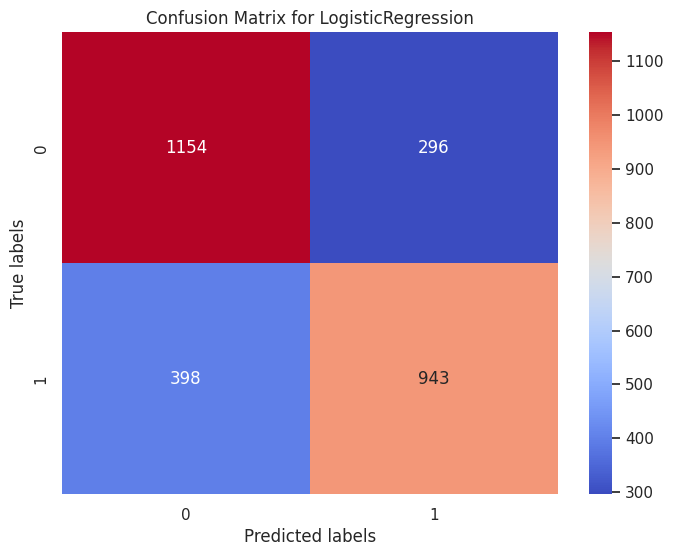


Confusion Matrix for DecisionTreeClassifier:
[[1115  335]
 [ 384  957]]


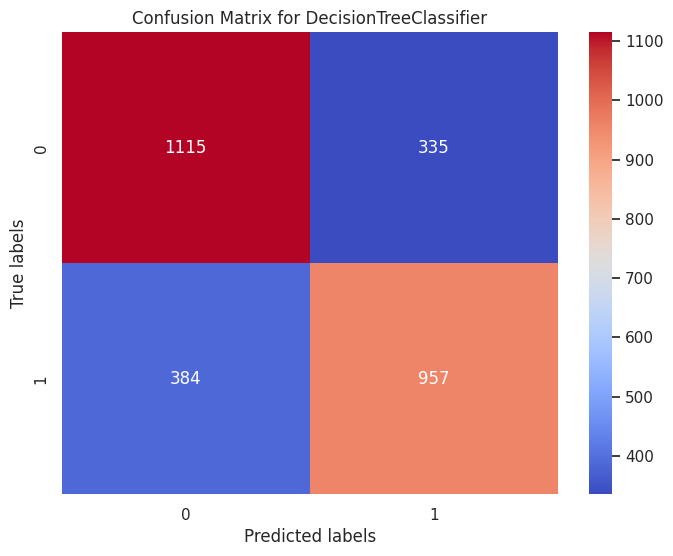


Confusion Matrix for RandomForestClassifier:
[[1164  286]
 [ 251 1090]]


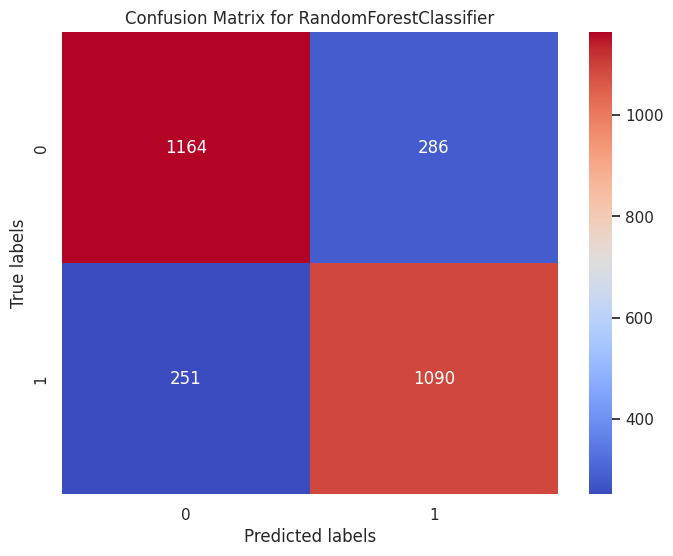


Confusion Matrix for GradientBoostingClassifier:
[[1175  275]
 [ 242 1099]]


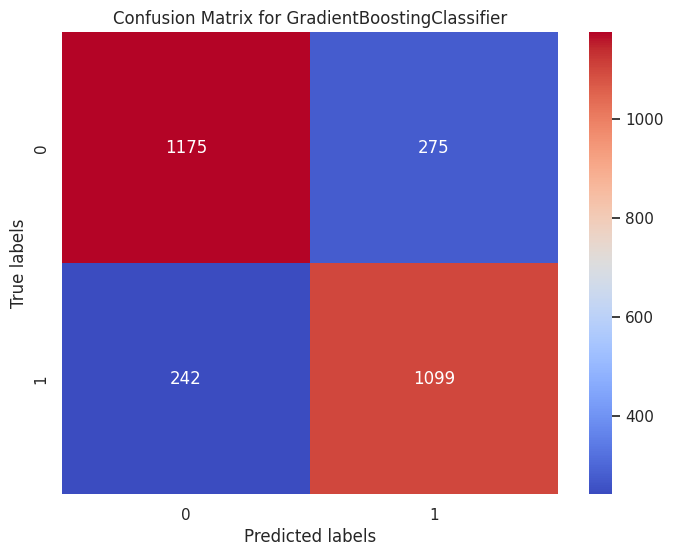


Confusion Matrix for AdaBoostClassifier:
[[1199  251]
 [ 302 1039]]


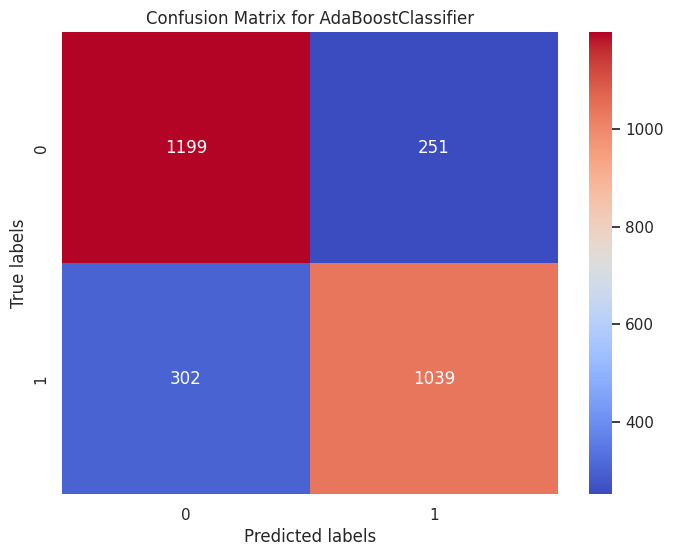


Confusion Matrix for KNeighborsClassifier:
[[1071  379]
 [ 427  914]]


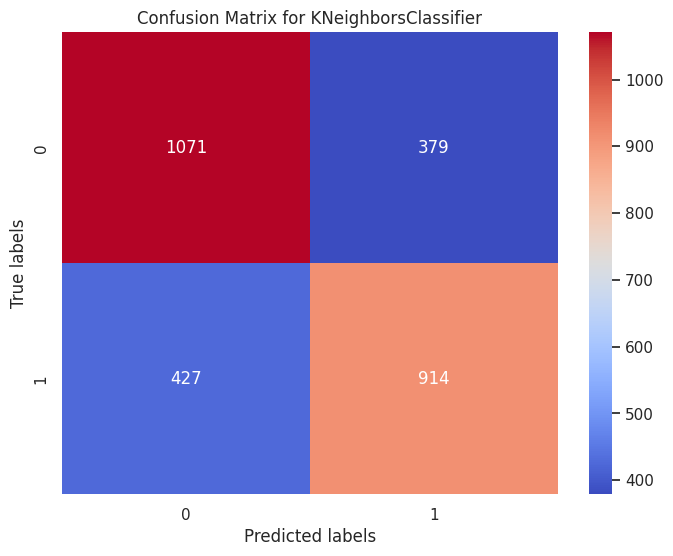


Confusion Matrix for SVC:
[[1196  254]
 [ 550  791]]


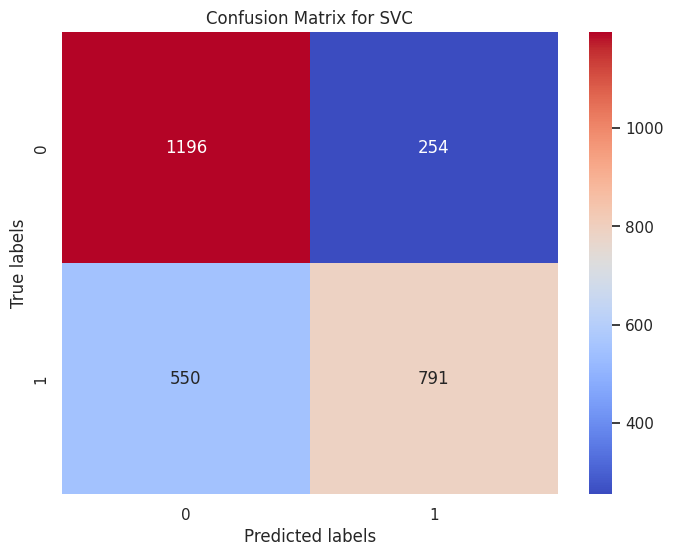


Confusion Matrix for GaussianNB:
[[ 977  473]
 [ 222 1119]]


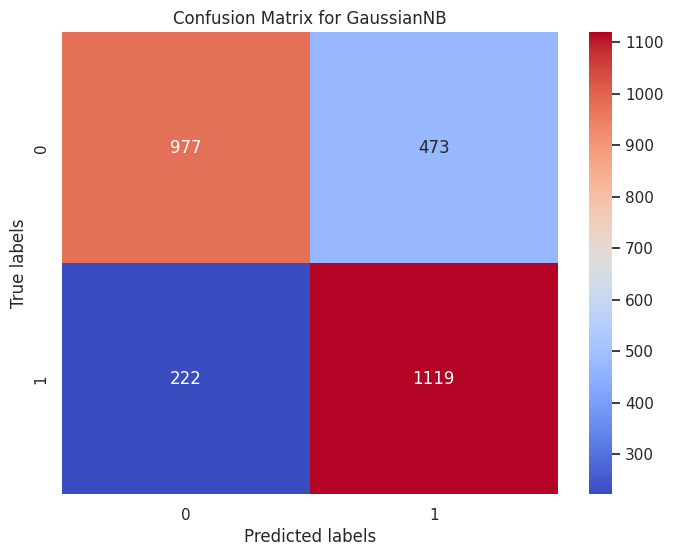


Confusion Matrix for MLPClassifier:
[[1425   25]
 [1220  121]]


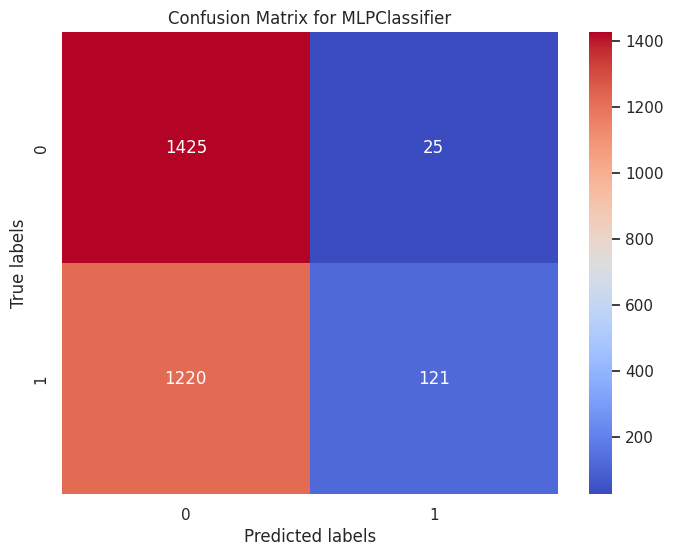


Confusion Matrix for QuadraticDiscriminantAnalysis:
[[ 959  491]
 [ 222 1119]]


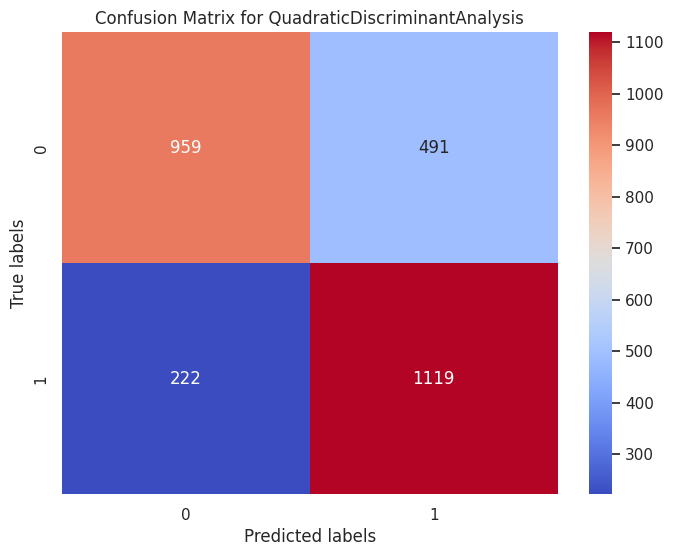


Confusion Matrix for GaussianProcessClassifier:
[[1086  364]
 [ 639  702]]


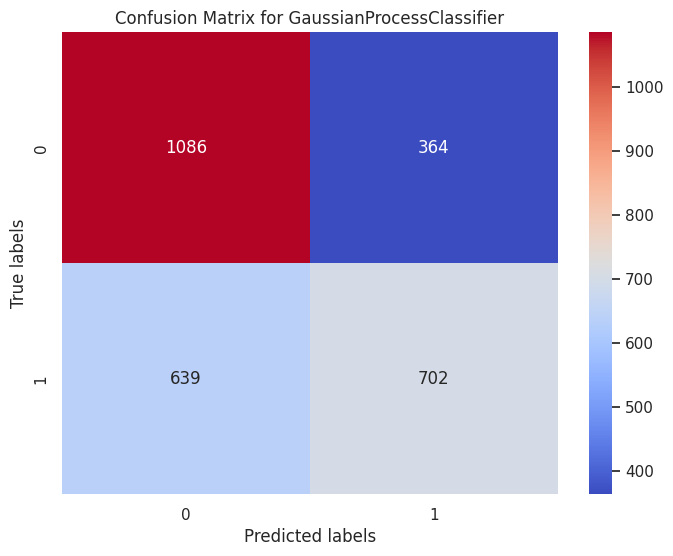

In [65]:
# Her bir model için döngü
for model in models:
    # Modeli eğit
    model.fit(x_train, y_train)

    # Model ismi
    model_name = type(model).__name__


    # Karışıklık matrisi
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

    # Karışıklık matrisi görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()